# **Appliances Energy Prediction :**

 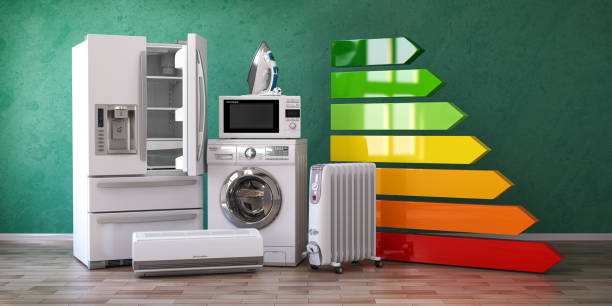

# **Name : Veenalakshmi P V**

# **Organization : Entri Elevate**


## Date : 30/12/2024 (Phase 3)  





# **1. Overview of the Problem Statement :**
This project focuses on predicting appliance energy consumption using environmental and indoor conditions. The problem revolves around building a machine learning model that utilizes features such as temperature, humidity, and weather conditions to forecast energy usage in a supervised regression framework.

# 2. **Objective:**

The primary objective of this project is to predict the energy consumption of appliances (Appliances) using various environmental and indoor sensor data, such as temperature, humidity, and weather conditions.

# 3. **Data Description:**

# **Source :**
Data Set Link : https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

The dataset appears to be related to energy consumption and environmental conditions, commonly used in research and modeling tasks.

# **Features** :

**Numerical Features:**

**T1, T2, T3, T4, T5, T6, T7, T8, T9:** Temperature readings at different time points or locations.

**RH_1, RH_2, RH_3, etc.:** Relative humidity readings at different times or locations.

**Appliances:** Power consumption by appliances (target variable).

**lights:** Power consumption by lights.

**T_out:** External temperature.

**Press_mm_hg:** Atmospheric pressure.

**Windspeed:** Wind speed.

**Visibility:** Visibility in the area.

**Tdewpoint:** Dew point.

**rv1, rv2:** Random variables used for noise in data collection.

**Categorical Features:**

**day_of_week:** Could represent the day of the week.

**appliance_type:** Type of appliance.

**location:** Location of the appliances or measurements.

**weather_condition:** Type of weather.

**date:** Timestamps for when each measurement was recorded.

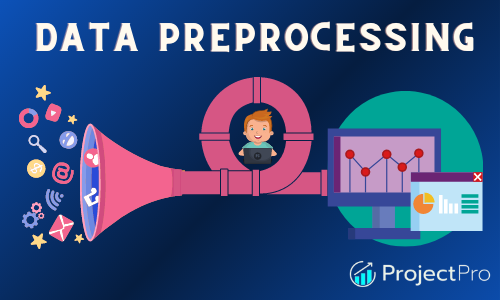

## 4. Data Collection and Exploration :

# **Load The Data set :**

In [ ]:
import pandas as pd

#Load the dataset

df = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
df.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [ ]:
df.shape

(19735, 29)

# **Info and Describe : **

In [ ]:
# Display the info of the dataset
print(df.info())

# Check column data types
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# **Gain insights into the data distribution, relationships, and potential patterns.**

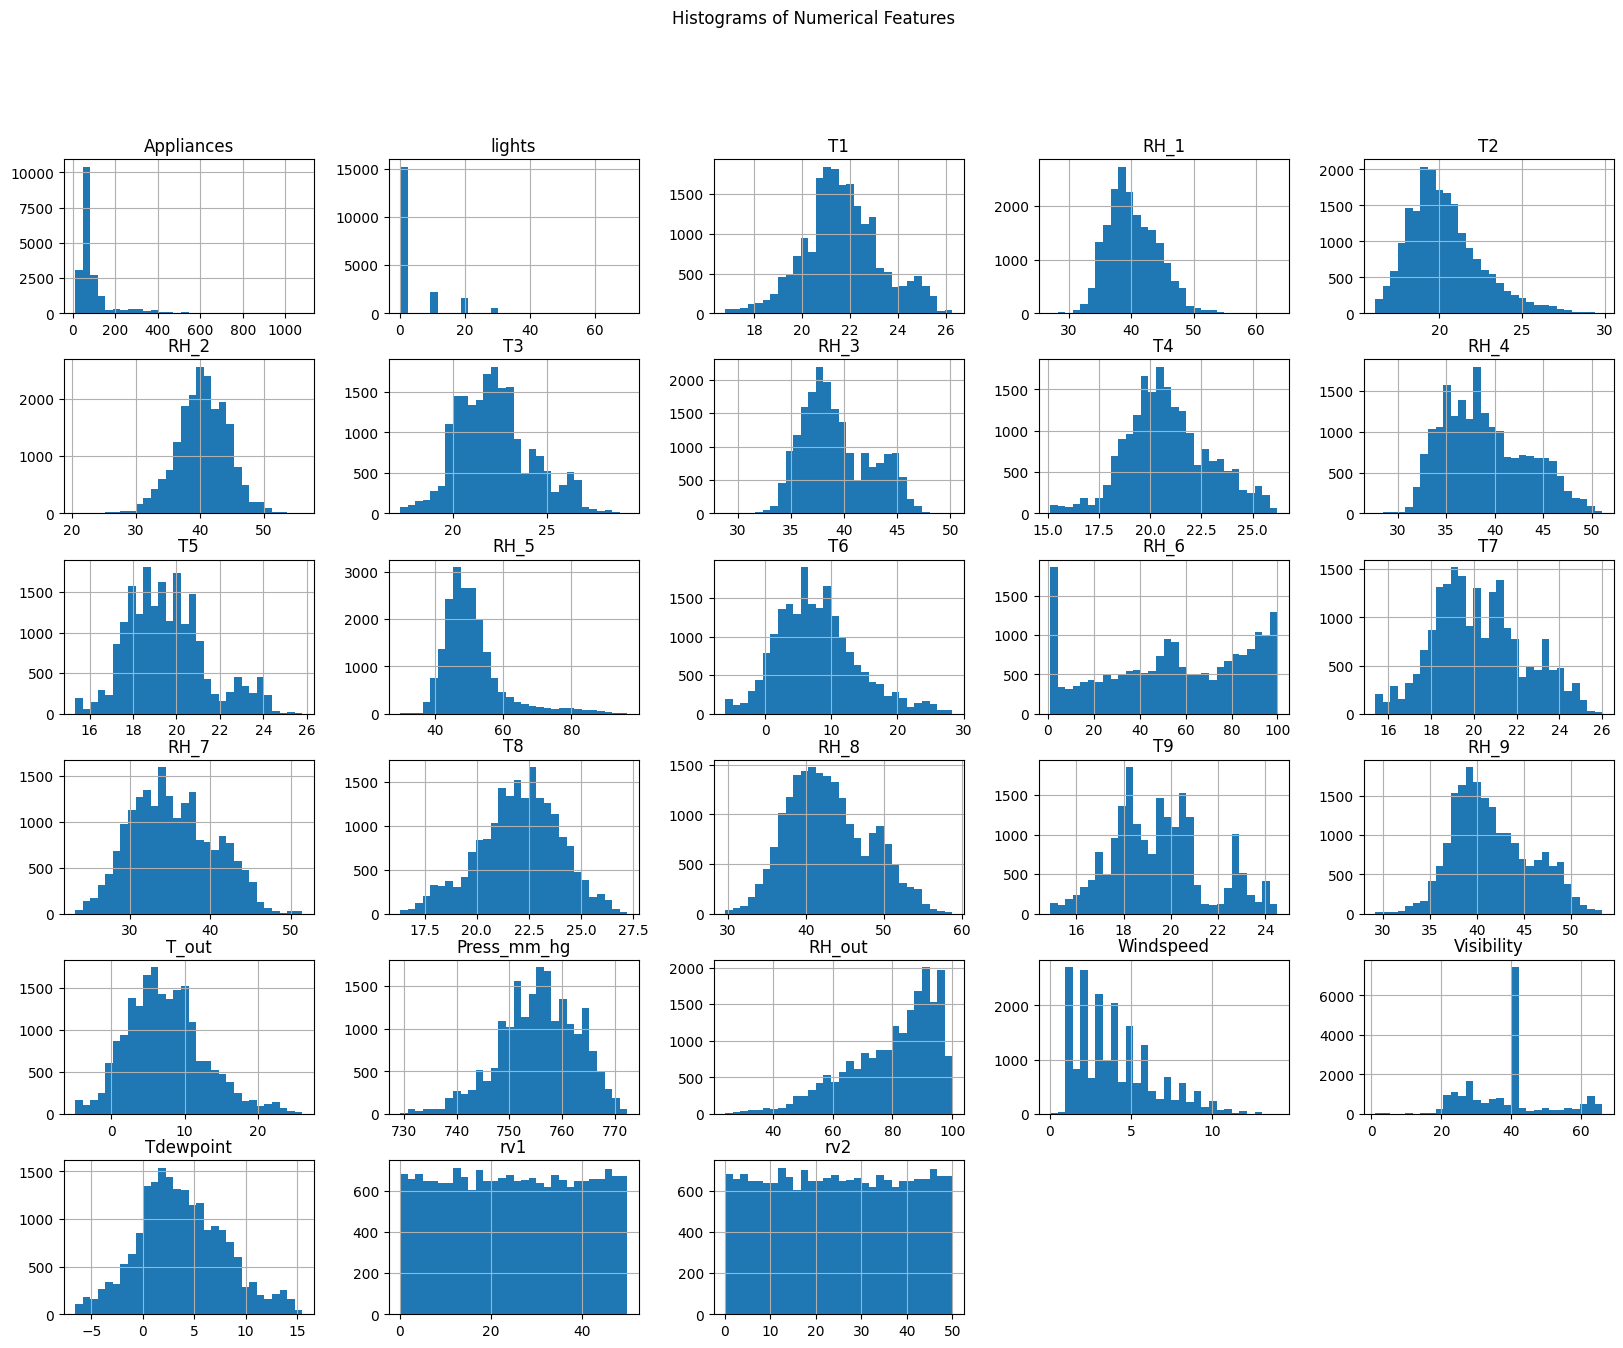

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()


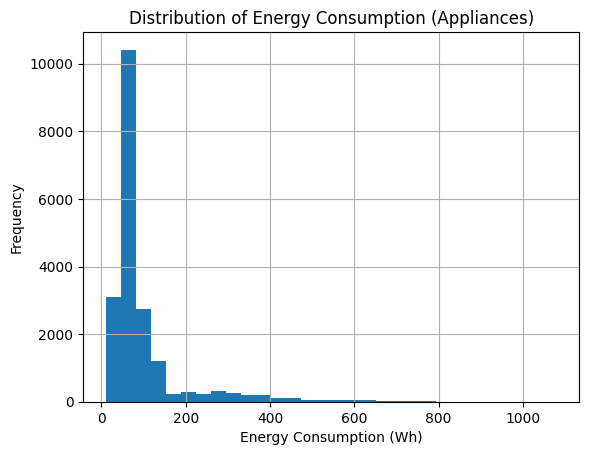

In [ ]:
import matplotlib.pyplot as plt

# Histogram for the target variable
df['Appliances'].hist(bins=30)
plt.title('Distribution of Energy Consumption (Appliances)')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


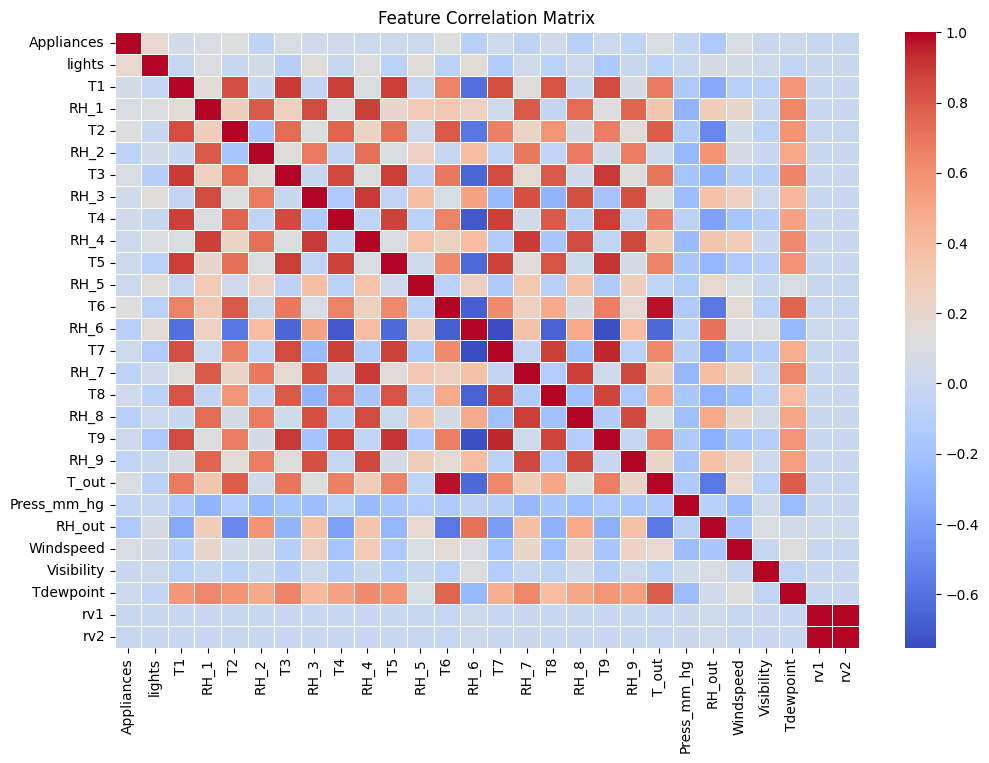

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


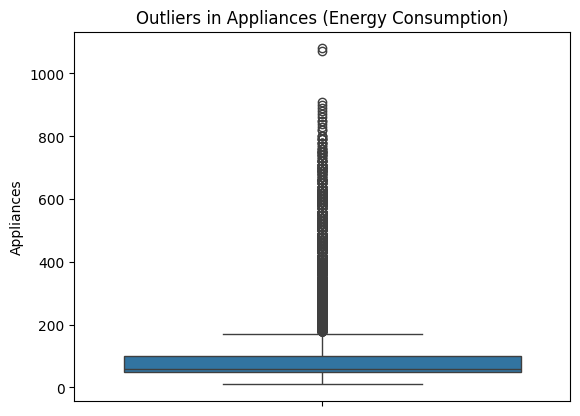

In [ ]:
sns.boxplot(df['Appliances'])
plt.title('Outliers in Appliances (Energy Consumption)')
plt.show()


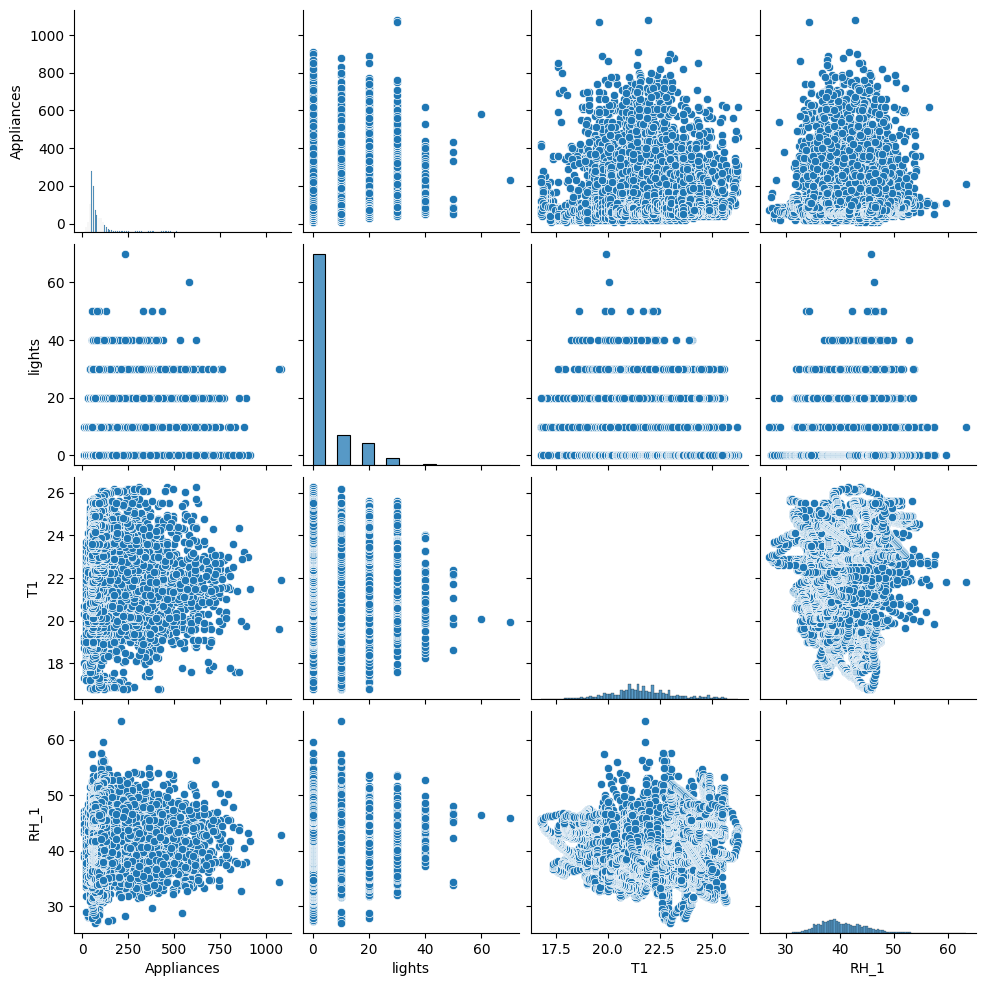

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Appliances', 'lights', 'T1', 'RH_1']])  # Replace with relevant columns
plt.show()


# **5. Data Preprocessing - Data Cleaning :**
       



# **Handle missing values using appropriate imputation techniques.**


In [ ]:

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)





Missing Values in Each Column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


# This Dataset Have No Missing Values  

In [ ]:
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (28,)
Numeric Features: Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (1,)
Categorical Features: Index(['date'], dtype='object')


In [ ]:
df.duplicated().sum()

0

No duplicated values found.



In [ ]:
df.isnull().sum()


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64



### **No Null Values**

# Handle Outliers :
Use methods like IQR or Z-score to detect and treat outliers.

In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Appliances     2138
lights         4483
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
RH_5           1330
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
T9                0
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Visibility     2522
Tdewpoint        10
rv1               0
rv2               0
dtype: int64


In [ ]:
import pandas as pd

def cap_outliers(df, columns, method="iqr", lower_bound=0.05, upper_bound=0.95):
    capped_df = df.copy()


    for col in columns:
        if method == "iqr":
            Q1 = capped_df[col].quantile(0.25)
            Q3 = capped_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            capped_df[col] = capped_df[col].clip(lower=lower, upper=upper)
        elif method == "percentile":
            lower = capped_df[col].quantile(lower_bound)
            upper = capped_df[col].quantile(upper_bound)
            capped_df[col] = capped_df[col].clip(lower=lower, upper=upper)

    return capped_df

# Apply outlier capping
columns_to_cap = ['Appliances', 'lights', 'T1', 'T2', 'T3', 'RH_5', 'Visibility', 'T_out', 'Press_mm_hg']
capped_df = cap_outliers(df, columns_to_cap, method="iqr")

print("Outliers capped successfully.")


Outliers capped successfully.


In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers for all numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

# Check shape of the cleaned data
print(f"Shape of data after removing outliers: {df.shape}")


Shape of data after removing outliers: (10106, 29)


In [ ]:
# Cap outliers to the threshold values (IQR method)
df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df[num_cols].shape)

Shape after capping outliers: (10106, 28)


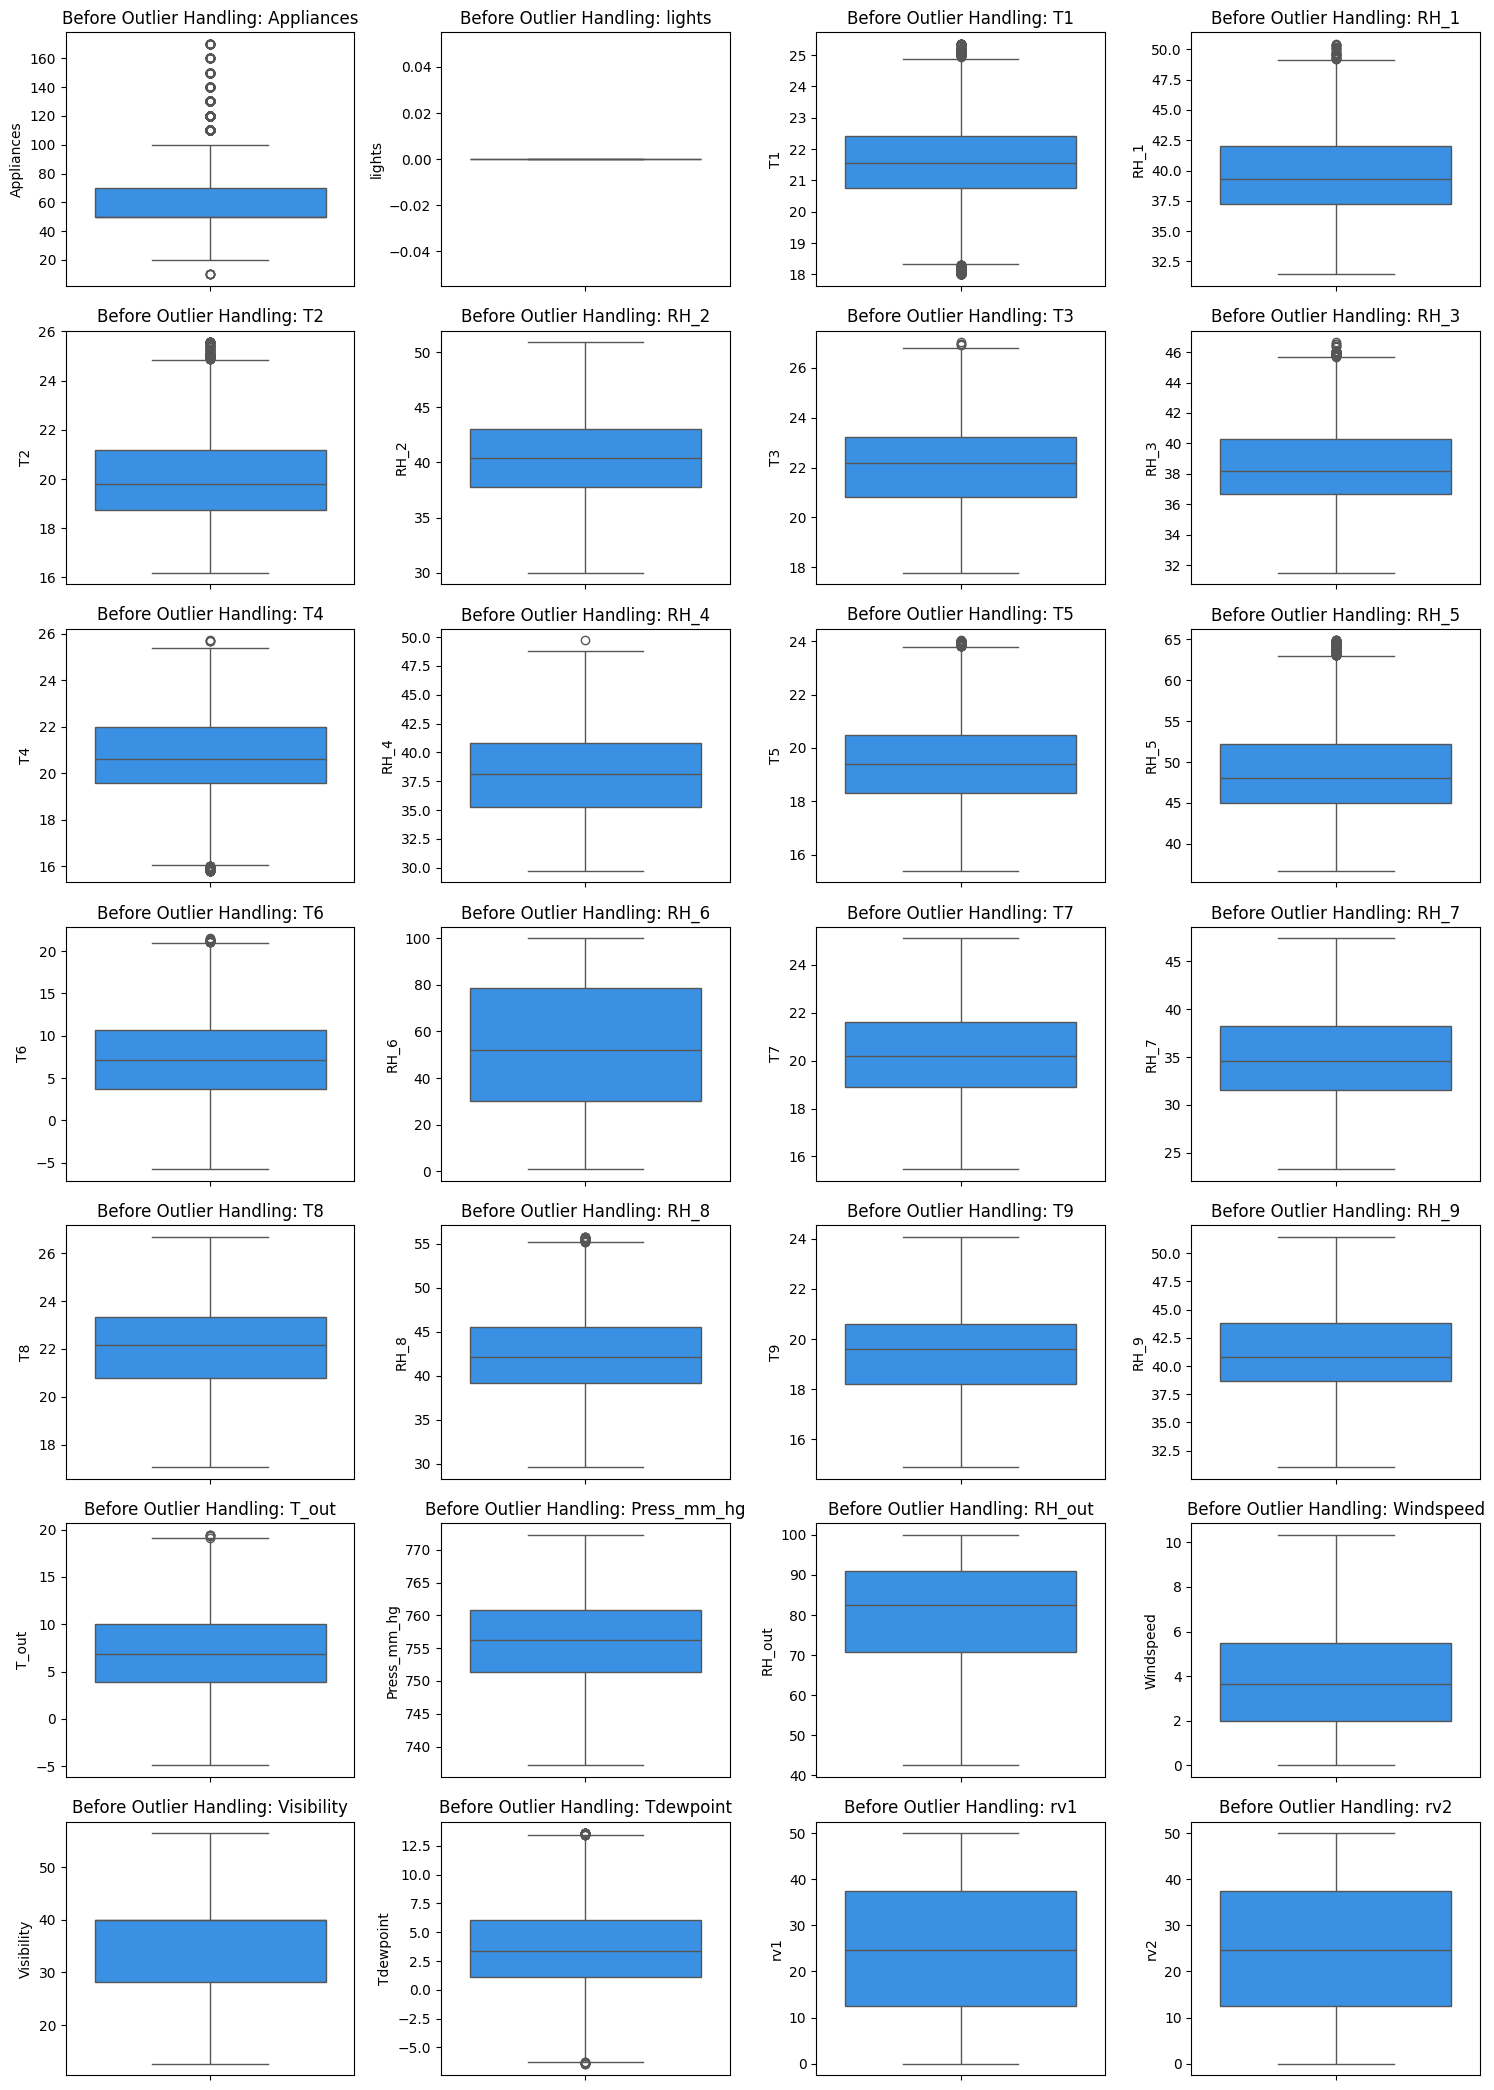

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns needed for the boxplots
n_cols = 4  # Number of columns per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate the required rows

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, n_rows * 3))  # Adjust figure height dynamically
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot position
    sns.boxplot(y=df[col], color='dodgerblue')  # Before outlier handling
    plt.title(f"Before Outlier Handling: {col}")

plt.tight_layout()
plt.show()




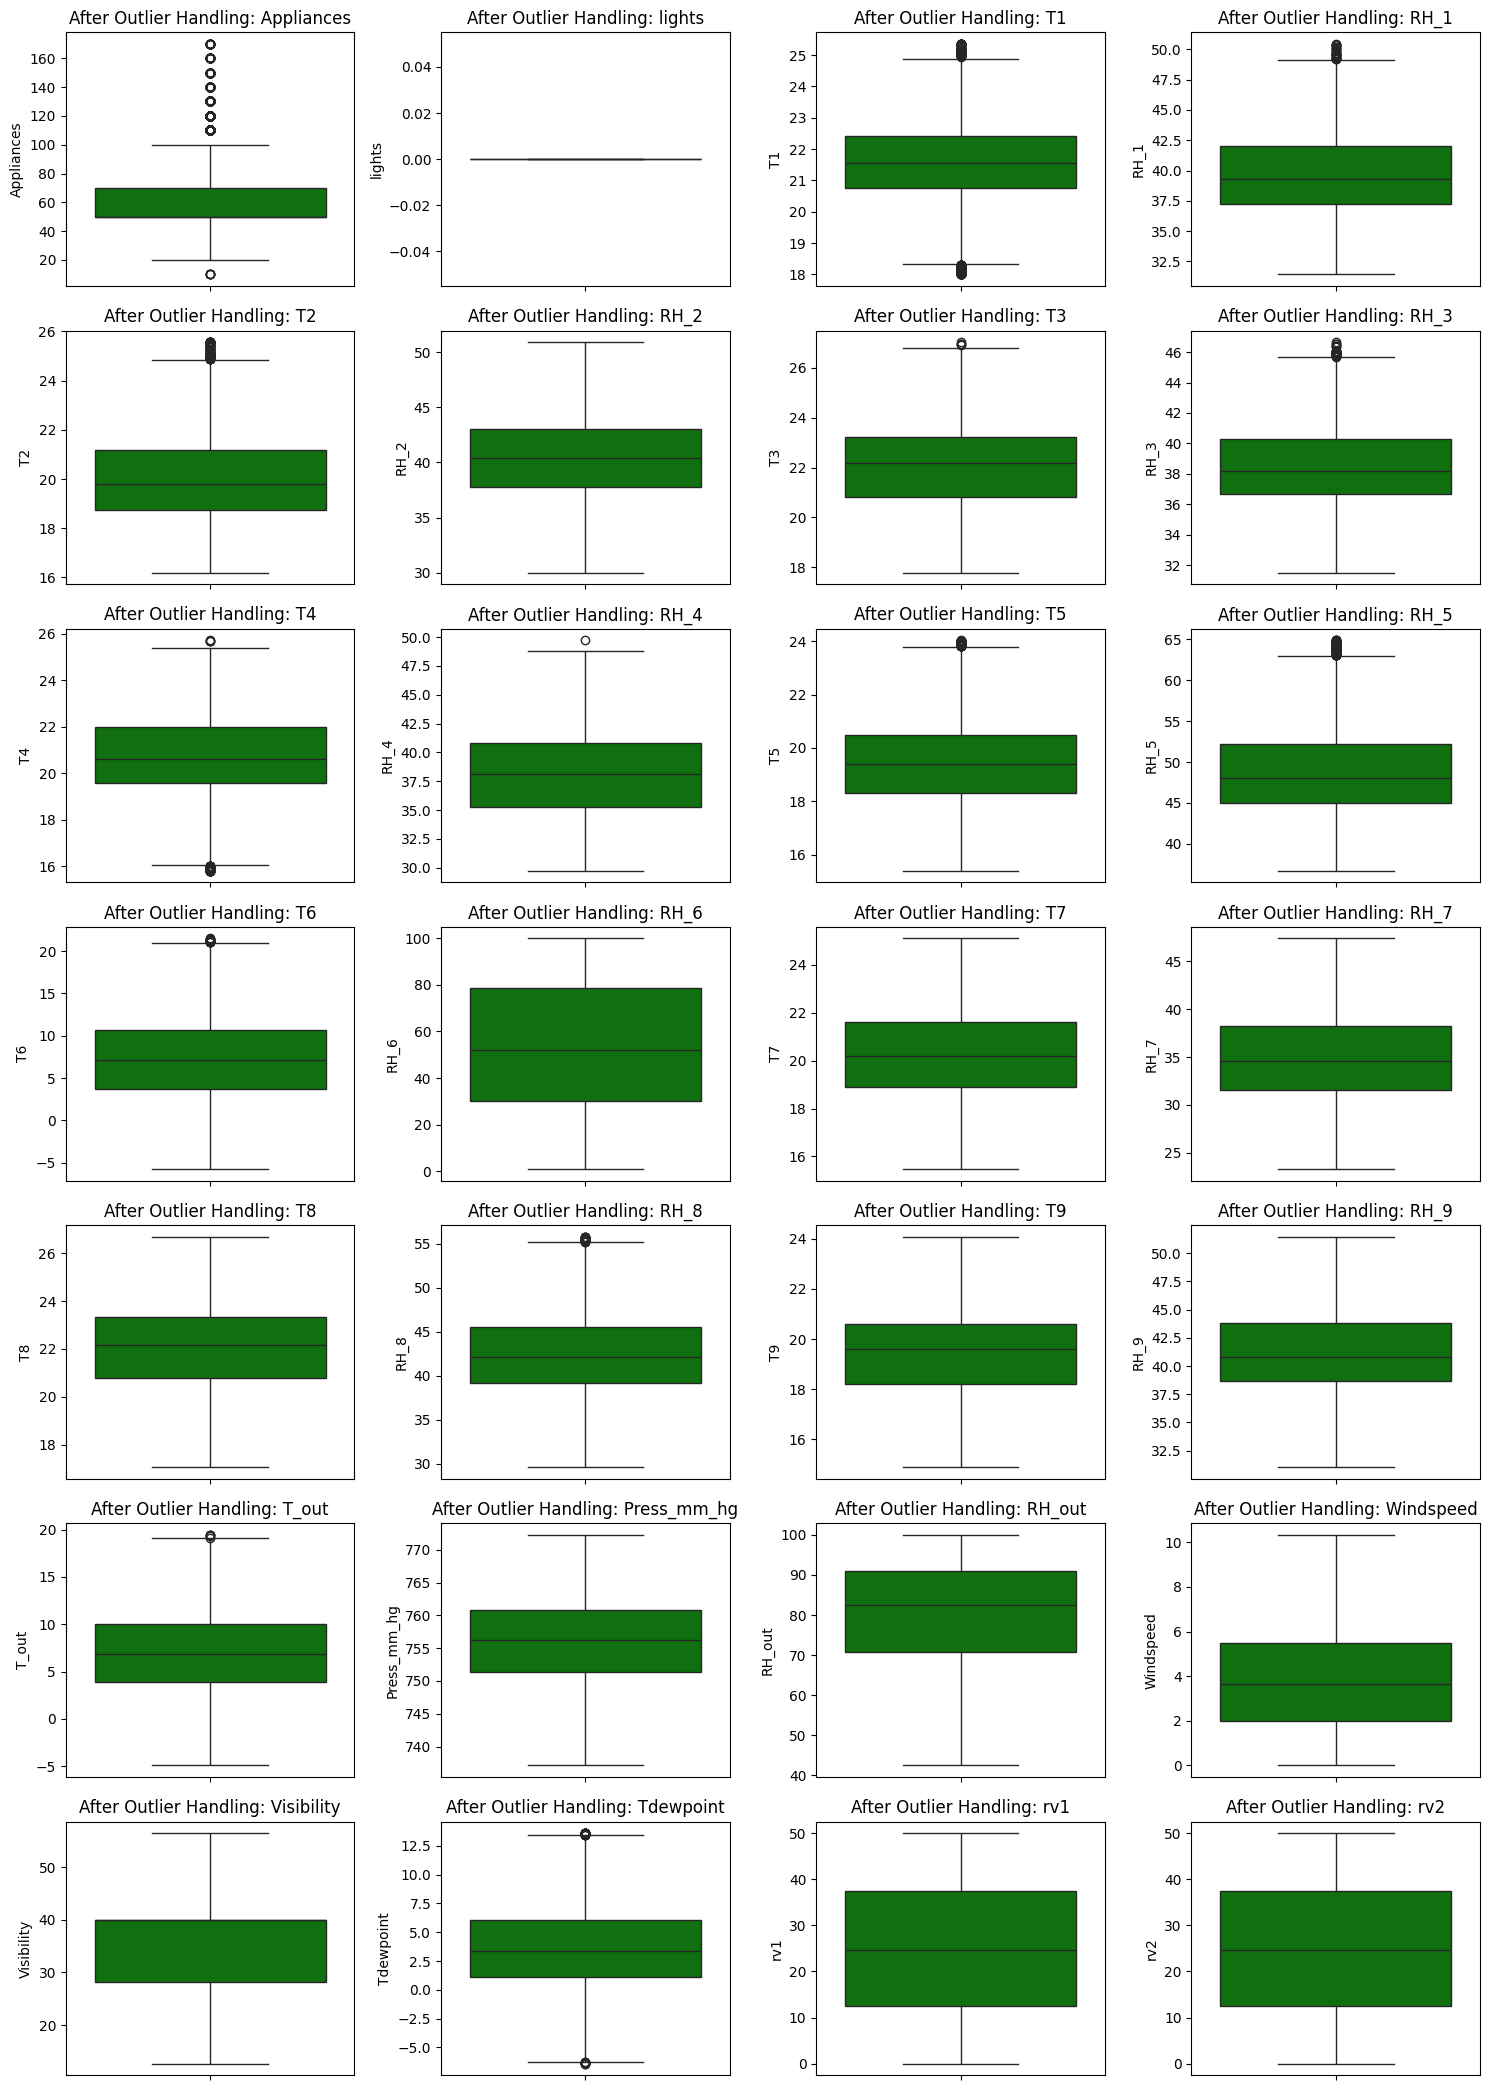

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate number of rows and columns based on the number of numerical columns
n_cols = 4  # Number of columns per row
n_rows = math.ceil(len(numerical_cols) / n_cols)  # Calculate required rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 3))  # Adjust figure height dynamically

# Plot boxplots for all numerical columns after outlier handling
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot position dynamically
    sns.boxplot(y=df[col], color='green')  # Boxplot after outlier handling
    plt.title(f"After Outlier Handling: {col}")

plt.tight_layout()
plt.show()


## **Skewness**

In [ ]:
from scipy.stats import skew


# Check skewness of numerical columns
skewed_features = df.select_dtypes(include=['float64', 'int64']).apply(skew)
print("Skewed Features:\n", skewed_features[abs(skewed_features) > 0.5])


Skewed Features:
 Appliances    1.333481
T2            0.523113
RH_3          0.634905
RH_4          0.527355
RH_5          0.516164
RH_out       -0.620705
Windspeed     0.663665
dtype: float64


# **Addressing Skewness** :

In [ ]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Appliances     1.333679
lights         0.000000
T1             0.037889
RH_1           0.420975
T2             0.523190
RH_2          -0.015477
T3             0.185792
RH_3           0.635000
T4             0.136928
RH_4           0.527433
T5             0.480950
RH_5           0.516241
T6             0.243539
RH_6          -0.105519
T7             0.173819
RH_7           0.251844
T8            -0.393532
RH_8           0.396918
T9             0.255404
RH_9           0.376199
T_out          0.107874
Press_mm_hg   -0.248154
RH_out        -0.620797
Windspeed      0.663763
Visibility    -0.149460
Tdewpoint     -0.002287
rv1            0.014926
rv2            0.014926
dtype: float64

No Skewness:
 lights         0.000000
T1             0.037889
RH_1           0.420975
RH_2          -0.015477
T3             0.185792
T4             0.136928
T5             0.480950
T6             0.243539
RH_6          -0.105519
T7             0.173819
RH_7           0.251844
T8  


# **6.Exploratory Data Analysis (EDA) **

# **Analysing numerical columns**



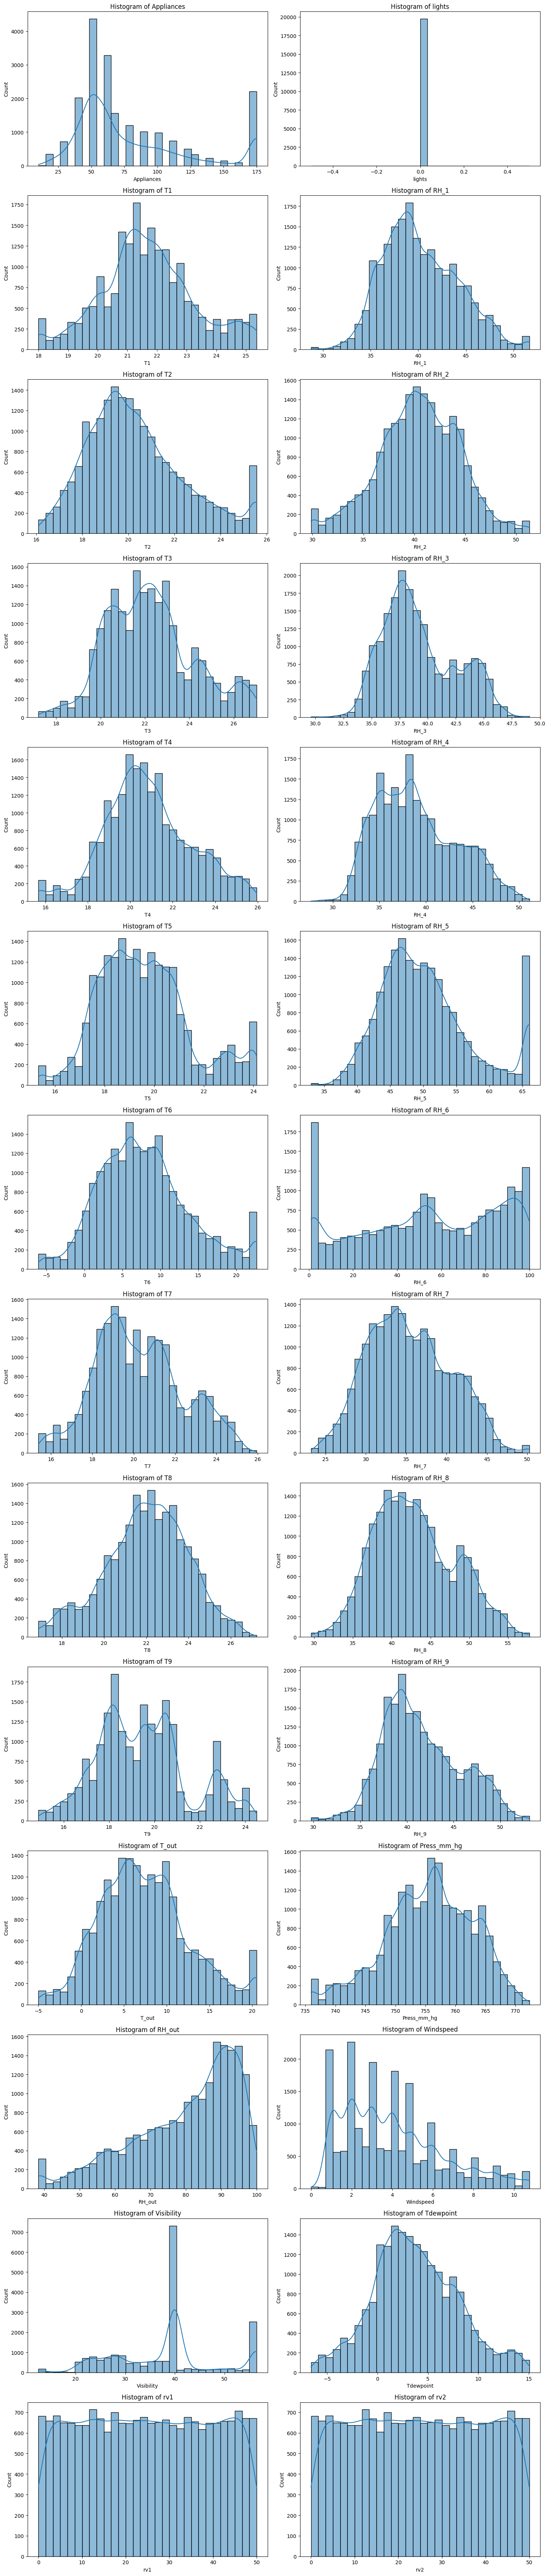

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math



num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of columns and rows dynamically
n_cols = 2  # Number of columns per row
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate the required number of rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 5))  # Adjust the height dynamically

# Plot histograms for all numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust subplot position dynamically
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


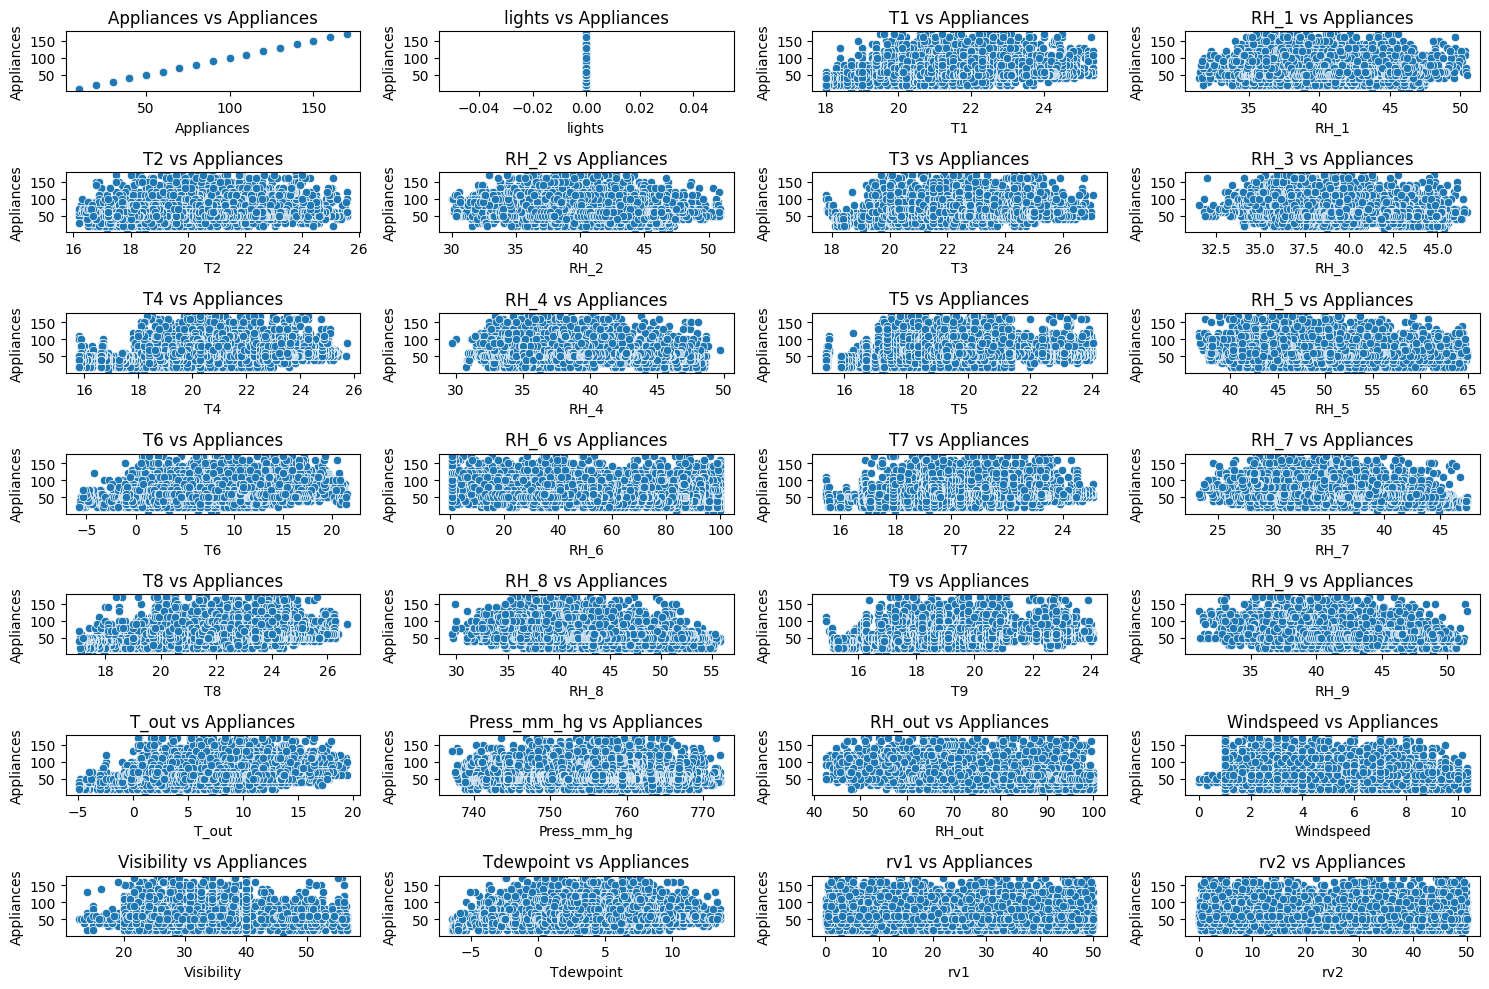

In [ ]:
import math

# Number of numerical columns
num_features = len(num_cols)

# Calculate the number of rows and columns needed for subplots
n_cols = 4  # Number of columns (you can adjust this if desired)
n_rows = math.ceil(num_features / n_cols)  # Calculate rows dynamically

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(n_rows, n_cols, i)  # Dynamically adjust rows and columns
    sns.scatterplot(data=df, x=col, y='Appliances')
    plt.title(f'{col} vs Appliances')
    plt.xlabel(col)
    plt.ylabel('Appliances')

plt.tight_layout()
plt.savefig("Scatter.png")
plt.show()


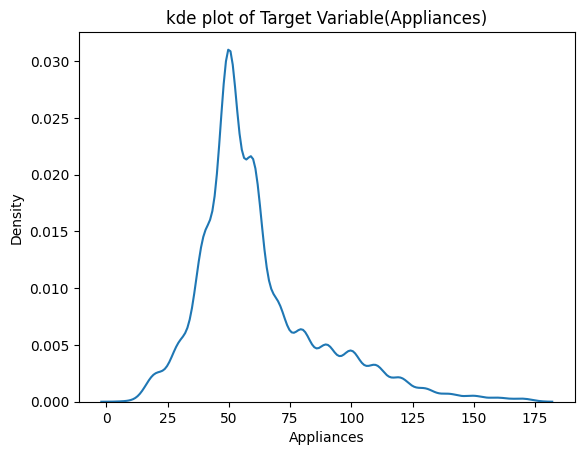

In [ ]:
sns.kdeplot(df.Appliances)
plt.title("kde plot of Target Variable(Appliances)")
plt.show()

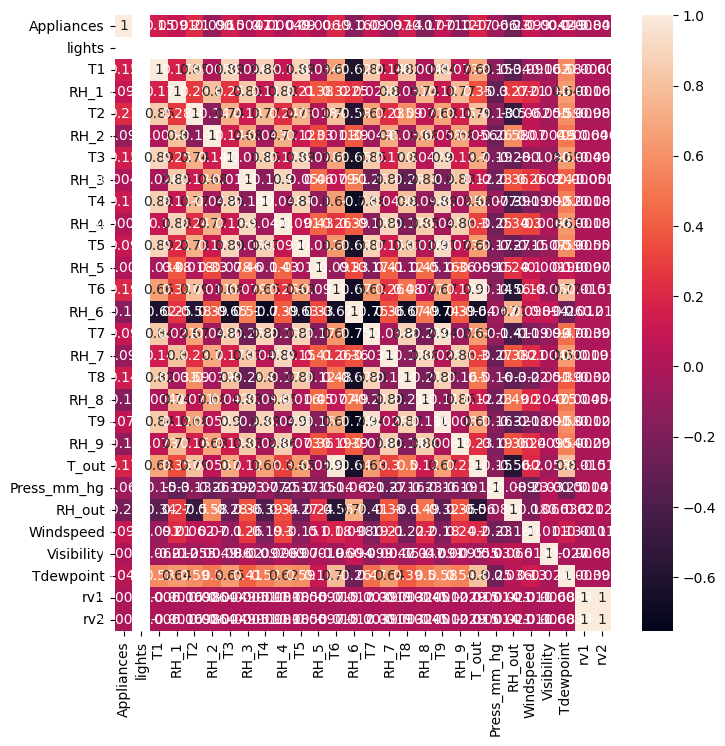

In [ ]:
corr1 = df[num_cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

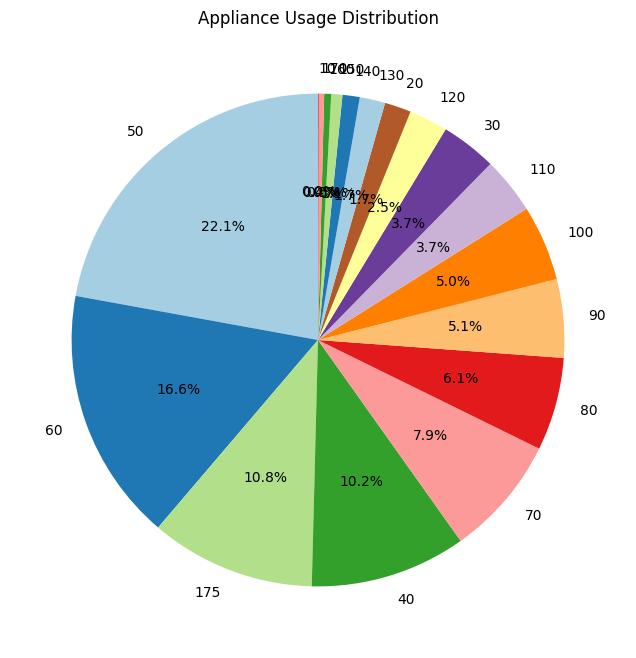

In [ ]:
# Count values in each bin
usage_counts = df['Appliances'].value_counts()

# Create the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    usage_counts,
    labels=usage_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Appliance Usage Distribution')
plt.show()


<ipython-input-37-462629cd63f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Appliances', data=df, palette='viridis')


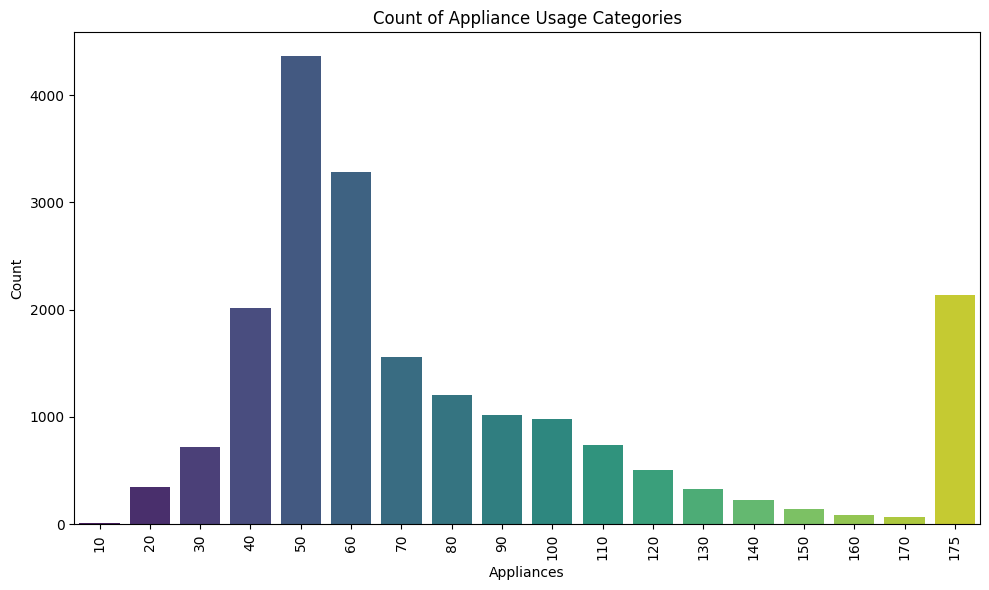

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.countplot(x='Appliances', data=df, palette='viridis')
plt.title('Count of Appliance Usage Categories')
plt.xlabel('Appliances')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-40-4e135a2d7338>:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['date'] = pd.date_range(start='2016-01-11 17:00:00', periods=len(df), freq='10T')


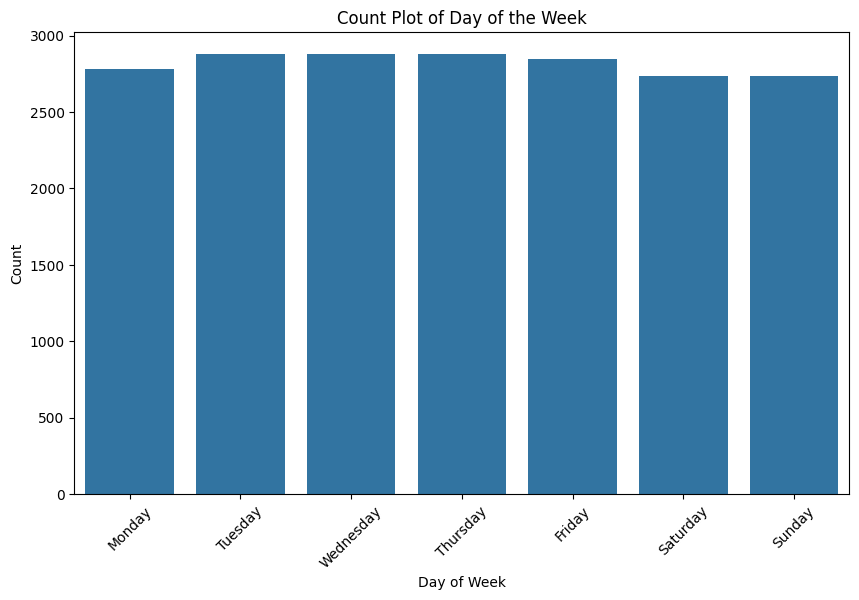

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic date column
# Assuming data starts on '2016-01-11 17:00:00' and is recorded every 10 minutes
df['date'] = pd.date_range(start='2016-01-11 17:00:00', periods=len(df), freq='10T')

# Create 'day_of_week' column
df['day_of_week'] = df['date'].dt.day_name()

# Bar plot for 'day_of_week' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


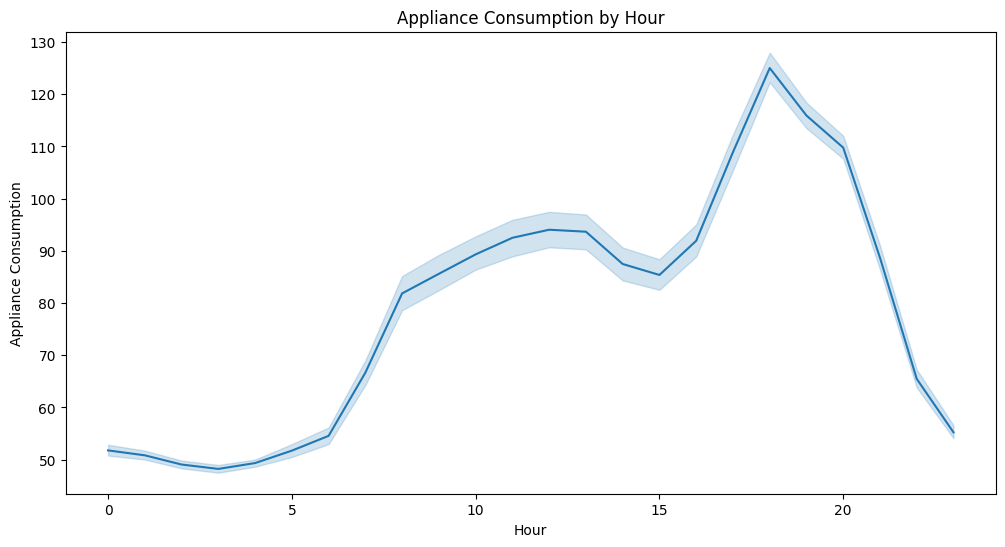

In [ ]:
df['hour'] = pd.to_datetime(df['date']).dt.hour

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Appliances', data=df)
plt.title('Appliance Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance Consumption')
plt.show()


#  ***7.*Feature Engineering:**
- Identify and encode categorical features using techniques like one-hot encoding or label
encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

 #Label Encoder

label_encoder = LabelEncoder()

# Encode the 'Category' column
df['Appliances_encoded'] = label_encoder.fit_transform(df['Appliances'])

print(df.head())


                   date  Appliances  lights         T1       RH_1     T2  \
51  2016-01-12 01:30:00          50       0  20.926667  45.590000  20.29   
52  2016-01-12 01:40:00          40       0  20.890000  45.666667  20.23   
53  2016-01-12 01:50:00          50       0  20.890000  46.060000  20.20   
54  2016-01-12 02:00:00          40       0  20.790000  46.200000  20.20   
55  2016-01-12 02:10:00          50       0  20.790000  46.200000  20.10   

         RH_2         T3    RH_3         T4  ...       RH_9     T_out  \
51  44.290000  20.166667  45.530  21.890000  ...  46.290000  5.150000   
52  44.290000  20.133333  45.500  21.823333  ...  46.433333  5.166667   
53  44.400000  20.200000  45.500  21.666667  ...  46.633333  5.183333   
54  44.466667  20.166667  45.500  21.533333  ...  46.826667  5.200000   
55  44.530000  20.125000  45.425  21.356667  ...  46.966667  5.133333   

    Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
51   737.900000    92.0   5.5000

# ***8 . Feature Selection :  ***

## **Random Forest :


Top Features by Random Forest Importance:
         Feature  Importance
21       RH_out    0.063970
2          RH_1    0.055810
20  Press_mm_hg    0.050082
10         RH_5    0.048531
4          RH_2    0.048455
16         RH_8    0.048406
5            T3    0.048284
6          RH_3    0.046895
0        lights    0.046280
15           T8    0.041014
12         RH_6    0.040658
14         RH_7    0.037722
18         RH_9    0.035286
3            T2    0.035156
7            T4    0.034959
8          RH_4    0.034132
9            T5    0.031526
11           T6    0.031315
17           T9    0.029631
1            T1    0.028835
24    Tdewpoint    0.028102
22    Windspeed    0.028074
13           T7    0.027077
19        T_out    0.023858
23   Visibility    0.020015
26          rv2    0.018194
25          rv1    0.017733


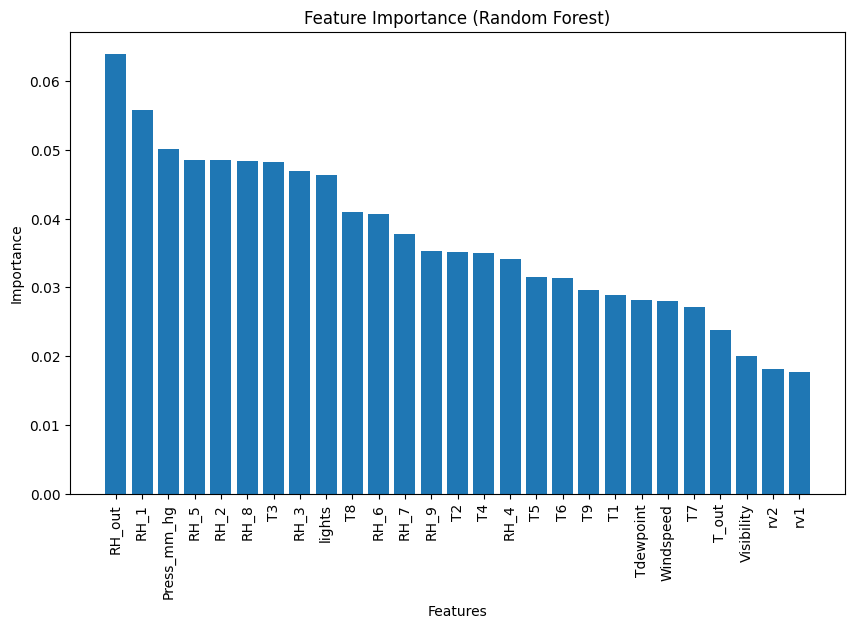

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt



# Drop 'date' column if present
if 'date' in df.columns:
    df = df.drop(columns=['date'])

# Features and Target
X = df.drop(columns=['Appliances'], axis=1)  # Exclude target column
y = df['Appliances']  # Target column

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# --- Random Forest Feature Importance ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop Features by Random Forest Importance:\n", importance_df)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## 9 . Split Data into Training and Testing Sets:

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('Appliances', axis=1)  # Features
y = df['Appliances']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (8084, 28)
Testing set features shape: (2022, 28)
Training set target shape: (8084,)
Testing set target shape: (2022,)


# 10. **Feature Scaling:**

#  Standardization

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Drop 'date' column and prepare features (X) and target (y)
if 'date' in df.columns:
    df = df.drop(columns=['date'])

X = df.drop(columns=['Appliances'])  # Features
y = df['Appliances']  # Target

# Select numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

#Standardization
standard_scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(X[numerical_features]), columns=numerical_features)

# Display the first few rows of scaled data

print("\nStandardized Data:\n", X_standard_scaled.head())



Standardized Data:
    lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0     0.0 -0.466438  1.746360  0.131436  1.087848 -1.185160  2.256795   
1     0.0 -0.492605  1.769122  0.098107  1.087848 -1.204425  2.246708   
2     0.0 -0.492605  1.885901  0.081443  1.118390 -1.165896  2.246708   
3     0.0 -0.563971  1.927466  0.081443  1.136900 -1.185160  2.246708   
4     0.0 -0.563971  1.927466  0.025896  1.154485 -1.209241  2.221491   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0  0.613947  2.145598 -0.315365  ... -1.471666  1.267568 -0.432869   
1  0.577221  1.958200 -0.359959  ... -1.471666  1.304665 -0.429087   
2  0.490917  1.915994 -0.382256  ... -1.471666  1.356430 -0.425304   
3  0.417466  1.883917 -0.382256  ... -1.471666  1.406469 -0.421521   
4  0.320144  1.875475 -0.382256  ... -1.431284  1.442704 -0.436652   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0    -2.619933  0.915696   0.626133   

## 11. **Build the ML Model:**

 Regression: SVR, MLP Regressor, Random Forest Regressor, Linear Regression,
Gradient Boost, Adaboost.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = df.drop(columns=['Appliances'])  # Features
y = df['Appliances']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}\n")

# Display results
print("Model Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")


Training SVR...
SVR - MSE: 614.8057, R2: 0.0128

Training MLP Regressor...
MLP Regressor - MSE: 453.1855, R2: 0.2723

Training Random Forest Regressor...
Random Forest Regressor - MSE: 216.3004, R2: 0.6527

Training Linear Regression...
Linear Regression - MSE: 428.8962, R2: 0.3113

Training Gradient Boosting...
Gradient Boosting - MSE: 358.1866, R2: 0.4248

Training AdaBoost Regressor...
AdaBoost Regressor - MSE: 532.5453, R2: 0.1449

Model Performance Summary:
SVR: MSE = 614.8057, R2 = 0.0128
MLP Regressor: MSE = 453.1855, R2 = 0.2723
Random Forest Regressor: MSE = 216.3004, R2 = 0.6527
Linear Regression: MSE = 428.8962, R2 = 0.3113
Gradient Boosting: MSE = 358.1866, R2 = 0.4248
AdaBoost Regressor: MSE = 532.5453, R2 = 0.1449


# 12. **Model Evaluation:**
- Regression Metrics: MAE, MSE, RMSE, R2 Score.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate and display metrics for a given model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)



Evaluating SVR...
Model: SVR
  Mean Absolute Error (MAE): 16.6142
  Mean Squared Error (MSE): 614.8057
  Root Mean Squared Error (RMSE): 24.7953
  R² Score: 0.0128

Evaluating MLP Regressor...
Model: MLP Regressor
  Mean Absolute Error (MAE): 15.3637
  Mean Squared Error (MSE): 453.1855
  Root Mean Squared Error (RMSE): 21.2882
  R² Score: 0.2723

Evaluating Random Forest Regressor...
Model: Random Forest Regressor
  Mean Absolute Error (MAE): 9.9606
  Mean Squared Error (MSE): 216.3004
  Root Mean Squared Error (RMSE): 14.7072
  R² Score: 0.6527

Evaluating Linear Regression...
Model: Linear Regression
  Mean Absolute Error (MAE): 15.2037
  Mean Squared Error (MSE): 428.8962
  Root Mean Squared Error (RMSE): 20.7098
  R² Score: 0.3113

Evaluating Gradient Boosting...
Model: Gradient Boosting
  Mean Absolute Error (MAE): 13.3370
  Mean Squared Error (MSE): 358.1866
  Root Mean Squared Error (RMSE): 18.9258
  R² Score: 0.4248

Evaluating AdaBoost Regressor...
Model: AdaBoost Regressor
 

# **Best Model Selection :**

In [ ]:
# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():

    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Convert results to DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(results).T

# Display the results for all models
print("\nComparison of All Models:")
print(results_df)

# Find the best model based on R² score
best_model_name = results_df['R2'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print("\nBest Model:")
print(f"  Model: {best_model_name}")
print(f"  Metrics: \n{best_model_metrics}")


Comparison of All Models:
                               MAE         MSE       RMSE        R2
SVR                      16.614179  614.805749  24.795277  0.012789
MLP Regressor            15.363659  453.185541  21.288155  0.272307
Random Forest Regressor   9.960584  216.300410  14.707155  0.652680
Linear Regression        15.203698  428.896164  20.709808  0.311309
Gradient Boosting        13.336993  358.186570  18.925818  0.424850
AdaBoost Regressor       18.255512  532.545260  23.076942  0.144877

Best Model:
  Model: Random Forest Regressor
  Metrics: 
MAE       9.960584
MSE     216.300410
RMSE     14.707155
R2        0.652680
Name: Random Forest Regressor, dtype: float64


# 13. **Hyperparameter Tuning:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Splitting data into features (X) and target (y)
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],           # Number of trees
    'max_depth': [None, 10, 20],          # Maximum depth of each tree
    'max_features': ['sqrt', 'log2'],     # Number of features to consider at each split
    'min_samples_split': [2, 5],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2],           # Minimum samples required to be at a leaf node
    'bootstrap': [True]                   # Whether bootstrap samples are used when building trees
}


# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,       # Cross-validation
    n_jobs=-1,  # Use all processors
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Best model evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Evaluation Metrics:
MAE: 9.9208
MSE: 214.4683
RMSE: 14.6447
R2 Score: 0.6556



# **14.Save the Model:**

In [ ]:

import joblib

# Save the model to a file
joblib.dump(best_model, 'energy_prediction_model.pkl')

print("Model saved successfully!")

Model saved successfully!


# **Load The Model**

In [ ]:
# Load the model
loaded_model = joblib.load('energy_prediction_model.pkl')

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import joblib

# Load the saved model
model = joblib.load('energy_prediction_model.pkl')

# Continue with predictions on unseen data
y_unseen_pred = model.predict(X_unseen)

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_unseen_true, y_unseen_pred)
mse = mean_squared_error(y_unseen_true, y_unseen_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen_true, y_unseen_pred)

print("Performance on Unseen Data:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


Performance on Unseen Data:
MAE: 19.91537198701798
MSE: 1864.0872517856014
RMSE: 43.17507674325086
R² Score: 0.8226506444408802


In [ ]:
# Ensure the unseen data has consistent features
X_unseen['year'] = pd.to_datetime(X_unseen['date']).dt.year
X_unseen['month'] = pd.to_datetime(X_unseen['date']).dt.month
X_unseen['day'] = pd.to_datetime(X_unseen['date']).dt.day
X_unseen['hour'] = pd.to_datetime(X_unseen['date']).dt.hour

# Drop the 'date' column as it wasn't used during training
X_unseen = X_unseen.drop(columns=['date'])


# **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X (features) and y (target)
# Initialize RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation (cv = 5)
cv_results = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')

# Convert negative MAE to positive MAE since cross_val_score returns negative values for loss metrics
mae_scores = -cv_results

# Cross-validated MAE, MSE, and R2
print(f"Cross_Validated MAE: Mean = {mae_scores.mean():.4f}, StdDev = {mae_scores.std():.4f}")

# Calculate MSE
mse_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Convert to positive MSE

print(f"Cross_Validated MSE: Mean = {mse_scores.mean():.4f}, StdDev = {mse_scores.std():.4f}")


# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Perform cross-validation using R² as the scoring metric
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Calculate and print the mean and standard deviation of R² scores
print(f"Cross_Validated R2: Mean  = {cv_scores.mean():.4f}, StdDev = {cv_scores.std():.4f}")



Cross_Validated MAE: Mean = 24.4252, StdDev = 5.3404
Cross_Validated MSE: Mean = 887.7563, StdDev = 324.8458
Cross_Validated R2: Mean  = 0.8478, StdDev = 0.0142


# **Pipeline** :

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', RandomForestRegressor())           # Random Forest Regressor
])
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)


# **15. **Test with Unseen Data:****

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")

# Split into training and unseen data
train_data = data.iloc[:int(len(data)*0.8)]  # 80% for training
unseen_data = data.iloc[int(len(data)*0.8):]  # 20% as unseen

# Save unseen data to a new CSV file
unseen_data.to_csv("unseen_energydata.csv", index=False)


In [ ]:

# First split: Separate unseen data (20% of the dataset)
X_temp, X_unseen, y_temp, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Create training and testing sets from the remaining 80%
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Check the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Unseen data shape:", X_unseen.shape)


Training data shape: (6063, 27)
Testing data shape: (2021, 27)
Unseen data shape: (2022, 27)


In [ ]:
print("Training data features:", X_train.columns)
print("Test data features:", X_test.columns)


Training data features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')
Test data features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')


In [ ]:
unseen_data.head()

date  Appliances  lights         T1       RH_1  \
15788  2016-04-30 08:20:00         370       0  21.390000  38.260000   
15789  2016-04-30 08:30:00         590       0  21.390000  38.126667   
15790  2016-04-30 08:40:00         320       0  21.390000  38.090000   
15791  2016-04-30 08:50:00         310      10  21.390000  38.030000   
15792  2016-04-30 09:00:00         260       0  21.323333  37.900000   

              T2       RH_2         T3    RH_3         T4  ...     T9  \
15788  19.133333  40.363333  22.600000  36.500  19.290000  ...  19.20   
15789  19.200000  40.230000  22.600000  36.545  19.356667  ...  19.20   
15790  19.263333  40.026667  22.633333  36.590  19.390000  ...  19.20   
15791  19.530000  39.766667  22.700000  36.590  19.463333  ...  19.20   
15792  19.730000  39.296667  22.700000  36.590  19.500000  ...  19.29   

            RH_9     T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
15788  40.760000  5.666667   758.233333  92.666667        1.0        40.0   
15789  40.566667  5.800000   758.300000  91.500000        1.0        40.0   
15790  40.363333  5.933333   758.366667  90.333333        1.0        40.0   
15791  40.290000  6.066667   758.433333  89.166667        1.0        40.0   
15792  40.400000  6.200000   758.500000  88.000000        1.0        40.0   

       Tdewpoint        rv1        rv2  
15788   4.533333  29.771444  29.771444  
15789   4.500000  27.174247  27.174247  
15790   4.466667  30.335592  30.335592  
15791   4.433333  32.784644  32.784644  
15792   4.400000  17.562462  17.562462  

[5 rows x 29 columns]

In [ ]:
X_test = X_test[X_train.columns]


In [ ]:
print("Updated Test data features:", X_test.columns)


Updated Test data features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and unseen (testing) sets
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Unseen data shape: {X_unseen.shape}")


Training data shape: (8084, 27)
Unseen data shape: (2022, 27)


In [ ]:
# Predict on test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Save the entire pipeline
joblib.dump(pipeline, 'Random_Forest_Regressor_pipeline.joblib')

['Random_Forest_Regressor_pipeline.joblib']

In [ ]:
# Assuming 'unseen_data' is a DataFrame loaded from 'unseen_energydata.csv'

# Ensure 'date' is in datetime format if it's a string
unseen_data['date'] = pd.to_datetime(unseen_data['date'])


unseen_data['year'] = unseen_data['date'].dt.year
unseen_data['month'] = unseen_data['date'].dt.month
unseen_data['day'] = unseen_data['date'].dt.day
unseen_data['hour'] = unseen_data['date'].dt.hour

# Drop the original 'date' column
unseen_data = unseen_data.drop(columns=['date'])

# Reorder columns to match the training data
# Get the column order from the training data (X_train)
train_cols = X_train.columns

# Select only the columns present in the training data and in the correct order
unseen_data = unseen_data[train_cols]

# predict using the pipeline
predictions = pipeline.predict(unseen_data)

<ipython-input-33-6cc53e0f686a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['date'] = pd.to_datetime(unseen_data['date'])
<ipython-input-33-6cc53e0f686a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['year'] = unseen_data['date'].dt.year
<ipython-input-33-6cc53e0f686a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
predictions = pipeline.predict(unseen_data)

In [ ]:

unseen_data['unseen_predictions'] = predictions



In [ ]:
print("Prediction:", predictions[0])

Prediction: 65.3


In [ ]:

unseen_data['predicted_energy'] = predictions
unseen_data.to_csv("predicted_energy.csv", index=False)

print("Predictions saved to 'predicted_energy.csv'")

Predictions saved to 'predicted_energy.csv'


# **Unseen Data Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on unseen data
y_unseen_pred = model.predict(X_unseen)

# Evaluate performance
mae = mean_absolute_error(y_unseen, y_unseen_pred)
mse = mean_squared_error(y_unseen, y_unseen_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_unseen_pred)

print(f"Performance on Unseen Data:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Performance on Unseen Data:
MAE: 9.9606
MSE: 216.3004
RMSE: 14.7072
R² Score: 0.6527
